In [1]:
from EasyModel.builders.preprocessor_builder import EasyPreprocessors
from EasyModel.builders.regressor_builder import EasyRegressors
from sklearn.linear_model import LassoCV, ElasticNetCV
import pandas as pd

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
preprocessors = EasyPreprocessors('regressors_inputs\preprocessors.json', '50_Startups.csv')
preprocessors.compute_preprocessors()

starting preprocessors
computing standard_scaler
computing target_variable
computing get_dummies
computing variance_inflation_factor
[('New York', 1.007244665999317), ('Florida', 1.0340134901109774), ('Administration', 1.177667141435859), ('Marketing Spend', 2.401832444356097), ('R&D Spend', 2.494701918365554)]


In [4]:
print(preprocessors._X.head(), "\n")
print(preprocessors._y.head())

   R&D Spend  Administration  Marketing Spend  Florida  New York
0   2.016411        0.560753         2.153943        0         1
1   1.955860        1.082807         1.923600        0         0
2   1.754364       -0.728257         1.626528        1         0
3   1.554784       -0.096365         1.422210        0         1
4   1.504937       -1.079919         1.281528        1         0 

      Profit
0  192261.83
1  191792.06
2  191050.39
3  182901.99
4  166187.94


In [5]:
models = EasyRegressors('regressors_inputs\models.json', 'regressors_inputs\gridsearchcv.json')

In [6]:
X_train, X_test, y_train, y_test = preprocessors.train_test_split(test_size=0.33, random_state=42)

optimal_lasso = LassoCV(n_alphas=1000, cv=10, verbose=1, n_jobs= 6)
optimal_lasso.fit(X_train, y_train)
print("lasso: " + str(optimal_lasso.alpha_))


optimal_EN  = ElasticNetCV(n_alphas=1000, cv=10, verbose=1, n_jobs= 6)
optimal_EN.fit(X_train, y_train)
print("EN: " + str(optimal_EN.alpha_))

# Update the following alpha values into the models.json, 

C:\Users\Tan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

...[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    1.3s finished
C:\Users\Tan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

lasso: 793.1359903974512


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

......................................................................................................................................................................................................................................................................................................................................................................................

EN: 81.1122337913246


...[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    1.5s finished


In [7]:
models.run(X_train, X_test, y_train, y_test, residual_diagnostic=True)

building models
--------------------LinearRegression--------------------
GridSearchCV(cv=5, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)
--------------------Lasso--------------------
GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1, 793.1359903974512]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)
--------------------ElasticNet--------------------
GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_

C:\Users\Tan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Tan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tan\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they de

C:\Users\Tan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\Tan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)
--------------------DecisionTreeRegressor--------------------
GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_wei

C:\Users\Tan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 300]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='r2', verbose=0)
--------------------BayesianRidge--------------------
GridSearchCV(cv=5, error_score='raise',
       estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)
--------------------LinearRegression--------------------
shapiro: The residuals are normally distributed. p value: 0.9622891545295715
acorr_ljungbox: Autocorrelati

In [8]:
models.score_reports()

LinearRegression: 0.8920888281606075
Lasso: 0.9175427941648355
ElasticNet: 0.8465818821187785
Ridge: 0.9112325896527712
KNeighborsRegressor: 0.7886176432772567
SGDRegressor: -1.7226910237129665
RandomForestRegressor: 0.9095205994720107
DecisionTreeRegressor: 0.814454646235338
AdaBoostRegressor: 0.8894855562816592
BayesianRidge: -0.10956163763559351


In [9]:
models.feature_inspect()

--------------------LinearRegression--------------------
           coef         variable       abscoef
0  36548.698231        R&D Spend  36548.698231
2   3447.979911  Marketing Spend   3447.979911
1  -2493.874834   Administration   2493.874834
4  -1214.079646         New York   1214.079646
3    403.924487          Florida    403.924487
--------------------Lasso--------------------
           coef         variable       abscoef
0  35573.759362        R&D Spend  35573.759362
2   3594.461939  Marketing Spend   3594.461939
1  -1324.613795   Administration   1324.613795
3      0.000000          Florida      0.000000
4     -0.000000         New York      0.000000
--------------------ElasticNet--------------------
           coef         variable       abscoef
0  20851.844191        R&D Spend  20851.844191
2  10843.649035  Marketing Spend  10843.649035
4    561.024982         New York    561.024982
3    554.438527          Florida    554.438527
1    165.767908   Administration    165.767908


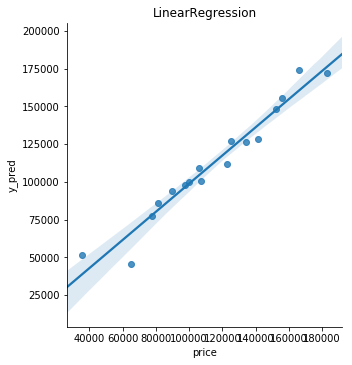

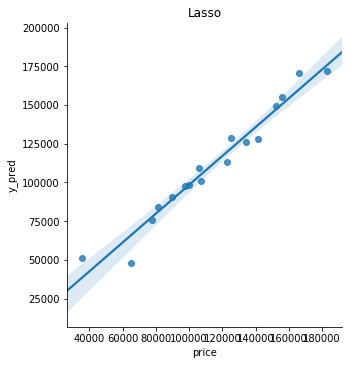

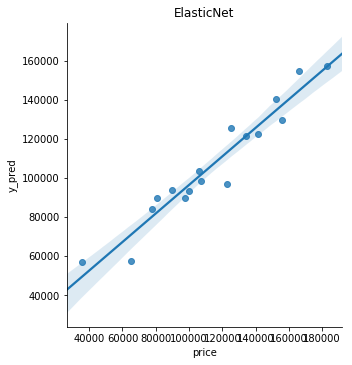

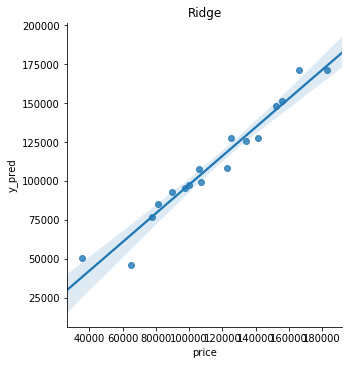

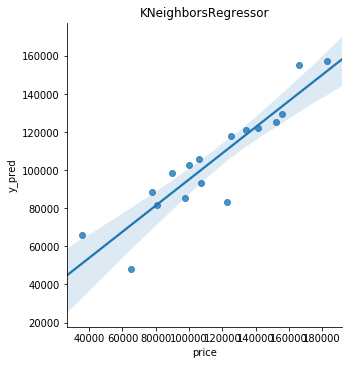

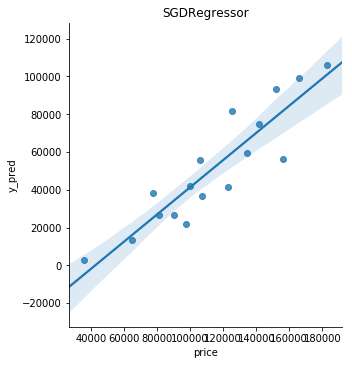

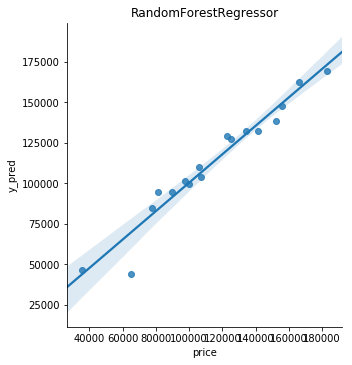

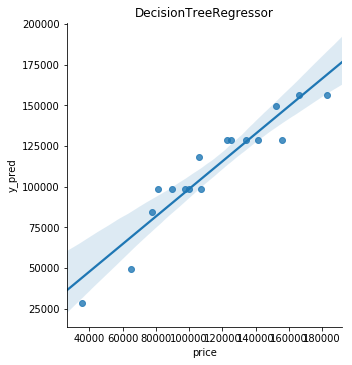

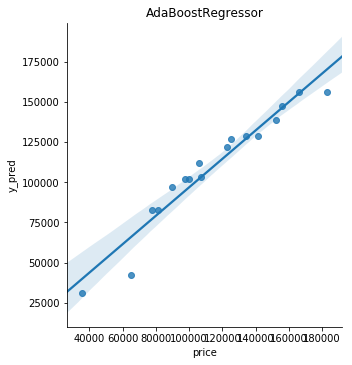

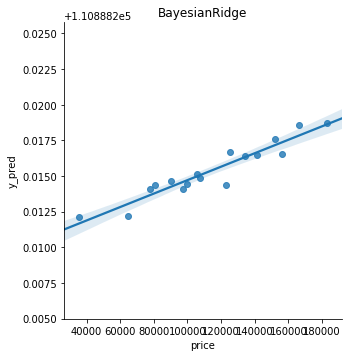

In [10]:
models.plot_results()